In [1]:
import numpy as np
import pandas as pd
from DataProcessing import Data

# 1. Get Data 

## 1.1. Get Data from folder

In [2]:
d = Data()
d.get_index_names()

S&P 500: ['AAPL', 'ORCL', 'GOOGL', 'AMZN', 'BK', 'LIFE', 'T', 'XOM']
 VN: ['VHM', 'CTR', 'FPT', 'MBB']


['AAPL',
 'ORCL',
 'GOOGL',
 'AMZN',
 'BK',
 'LIFE',
 'T',
 'XOM',
 'VHM',
 'CTR',
 'FPT',
 'MBB']

In [3]:
chosen_index = 'GOOGL'

In [4]:
d.preprocess(chosen_index)

Processing GOOGL.csv
Saved GOOGL data at data/processed/GOOGL.csv


In [24]:
df = d.get_data(chosen_index)
df= df.drop(['Date','Volume'],axis=1)

In [25]:
df.head

<bound method NDFrame.head of            Close        RSI        MFI         EMA         SO        MACD   
0      59.949001  50.574879  42.786029   59.689202  48.691998   59.964867  \
1      60.277000  52.087369  41.757490   59.767575  57.677051   59.998106   
2      60.540501  55.936618  47.586047   59.870632  64.895251   60.026844   
3      60.972500  59.088364  56.777268   60.017547  76.729233   60.089491   
4      60.572498  56.871903  57.361764   60.091541  65.771781   60.038138   
...          ...        ...        ...         ...        ...         ...   
1240  132.669998  27.724177  36.673777  138.831853  12.618292  141.871540   
1241  131.399994  24.455353  31.088742  137.840939   5.094177  141.254585   
1242  134.380005  35.160951  38.671604  137.379481  25.889785  141.236603   
1243  135.410004  40.554529  45.948062  137.116884  33.077494  140.901984   
1244  137.669998  43.991647  46.660682  137.190632  48.848563  140.753424   

      Next Day Price  
0          60.277000  

In [26]:
df.columns

Index(['Close', 'RSI', 'MFI', 'EMA', 'SO', 'MACD', 'Next Day Price'], dtype='object')

# 2. Train model

In [16]:
from sklearn.model_selection import  train_test_split

In [27]:
X = df[df.columns[0:6]].values
Y = df[df.columns[6]].values

## 2.1. Split data

### 2.1.2. Unchronologically

In [28]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=37,shuffle=True)

### 2.1.2. Chronologically

In [41]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=37,shuffle=False)

## 2.2. SCikit-learn Model

In [18]:
from sklearn.neural_network import MLPRegressor

In [42]:
model = MLPRegressor(random_state=1,activation='relu',solver='adam', max_iter=400)
model.fit(X_train,Y_train)
model.score(X_test,Y_test)
Y_predict = model.predict(X_test)

## 2.3. Pytorch Model

In [34]:
import torch.nn as nn
import torch
import torch.optim as optim
import torch.nn.functional as func

In [35]:
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
Y_train = torch.FloatTensor(Y_train)
Y_test = torch.FloatTensor(Y_test)

In [36]:
model = nn.Sequential(
    nn.Linear(X_train.shape[1],100),
    nn.ReLU(),
    nn.Linear(100,1)
)

In [37]:
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(),lr=0.0001)

In [38]:
for i in range(400):
    for j in range(X_train.shape[0]):
        Y_pred = model(X_train[j])
        loss = criterion(Y_pred, Y_train[j].reshape(1))
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

Y_pred = []
with torch.no_grad():
    for i,data in enumerate(X_test):
        Y_pred.append(model(data).detach().numpy())

## Plot Result

In [31]:
import matplotlib.pyplot as plt

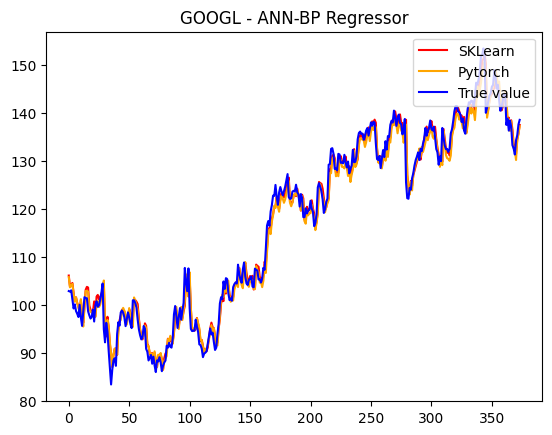

In [40]:
plt.plot(Y_predict,color='red',label='SKLearn')
plt.plot(Y_pred,color='orange',label='Pytorch')
plt.plot(Y_test,color='blue',label='True value')
plt.legend(loc='upper right')
plt.title(f'{chosen_index} - ANN-BP Regressor')
plt.show()